In [37]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Replace the path with the correct path for your data.
y2015 = pd.read_csv('https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    header=1
)
y2015.columns = y2015.columns.str.strip().str.lower().str.replace(' ', '_')

/Users/kingcheneyon/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
y2015.info()
y2015.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(85), object(26)
memory usage: 356.6+ MB


(421097, 111)

In [39]:
y2015.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [40]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
11
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


In [41]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [42]:
continous = y2015.select_dtypes(['float64'])
for i in continous:
    column = continous[i]
    print(i)
    print(column.nunique())

id
421095
member_id
421095
loan_amnt
1361
funded_amnt
1361
funded_amnt_inv
1366
int_rate
110
installment
40495
annual_inc
26903
dti
4086
delinq_2yrs
26
inq_last_6mths
7
mths_since_last_delinq
140
mths_since_last_record
121
open_acc
73
pub_rec
28
revol_bal
62072
total_acc
126
out_prncp
120654
out_prncp_inv
130630
total_pymnt
275495
total_pymnt_inv
279430
total_rec_prncp
136974
total_rec_int
219016
total_rec_late_fee
2500
recoveries
10436
collection_recovery_fee
10560
last_pymnt_amnt
123886
collections_12_mths_ex_med
10
mths_since_last_major_derog
162
policy_code
1
annual_inc_joint
308
dti_joint
449
acc_now_delinq
8
tot_coll_amt
8350
tot_cur_bal
230329
open_acc_6m
13
open_il_6m
35
open_il_12m
12
open_il_24m
17
mths_since_rcnt_il
201
total_bal_il
17030
il_util
160
open_rv_12m
18
open_rv_24m
28
max_bal_bc
10707
all_util
139
total_rev_hi_lim
10694
inq_fi
18
total_cu_tl
33
inq_last_12m
28
acc_open_past_24mths
47
avg_cur_bal
56003
bc_open_to_buy
51127
bc_util
1320
chargeoff_within_12_mths
10


In [43]:
# Remove two summary rows at the end that don't actually contain data.
y2015=y2015[:-2]

In [44]:
missing_values = y2015.isnull().sum().sort_values(ascending=False)
percent_missing = (y2015.isnull().sum()/y2015.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([missing_values, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_values.head()

,Total,Percent
dti_joint,420586,0.998791
annual_inc_joint,420584,0.998786
verification_status_joint,420584,0.998786
il_util,402478,0.955789
mths_since_rcnt_il,400285,0.950581


In [45]:
 #loan_amount, funded_amnt_inv, installment, total_pymnt_inv, total_rec_int tax_liens, percent_bc_gt_75

y2015.drop(['tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
            'mths_since_recent_revol_delinq','pct_tl_nvr_dlq','percent_bc_gt_75','mo_sin_old_rev_tl_op',
            'mo_sin_rcnt_rev_tl_op', 'mths_since_recent_bc','mo_sin_rcnt_tl','mort_acc','delinq_amnt',
            'mths_since_recent_bc_dlq','mo_sin_old_il_acct','num_accts_ever_120_pd','num_actv_bc_tl',
           'num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts',
            'num_rev_tl_bal_gt_0','num_sats','annual_inc', 'out_prncp_inv','mths_since_rcnt_il'],1, inplace=True)

In [46]:
y2015.drop(['bc_util','bc_open_to_buy','avg_cur_bal','acc_open_past_24mths','total_cu_tl','total_rev_hi_lim',
           'all_util','max_bal_bc','il_util','total_bal_il','open_il_6m','tot_cur_bal','tot_coll_amt','dti_joint',
           'annual_inc_joint','mths_since_last_major_derog','collection_recovery_fee','recoveries',
            'total_rec_late_fee','total_rec_prncp','total_acc','mths_since_last_record','mths_since_last_delinq',
           'dti'],1, inplace=True)



(array([0.5]), <a list of 1 Text yticklabel objects>)

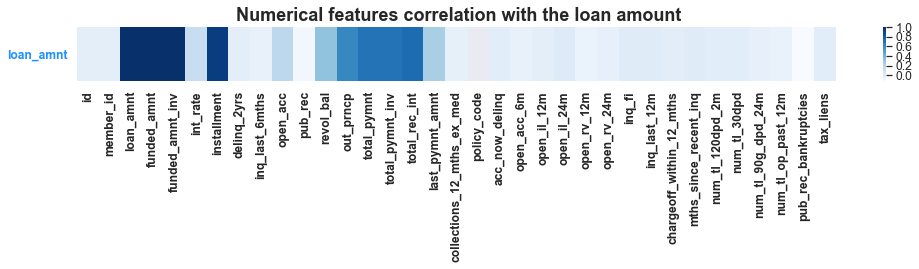

In [47]:
num=y2015.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['loan_amnt'], ascending=False).head(1), cmap='Blues')
plt.title(" Numerical features correlation with the loan amount", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

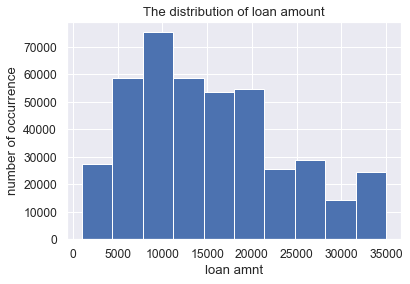

In [48]:
plt.hist(y2015.loan_amnt)
plt.title("The distribution of loan amount")
plt.xlabel("loan amnt")
plt.ylabel("number of occurrence")
plt.show()

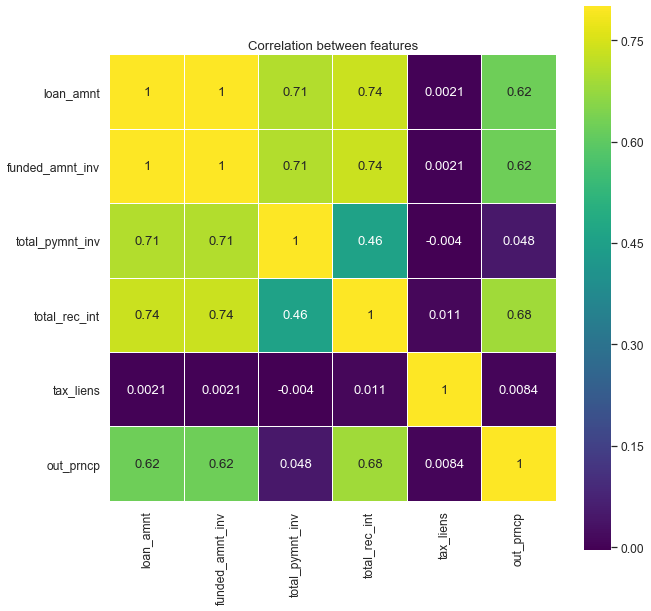

In [49]:
corrMatrix=y2015[['loan_amnt', 'funded_amnt_inv', 'total_pymnt_inv', 'total_rec_int', 'tax_liens','out_prncp']].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

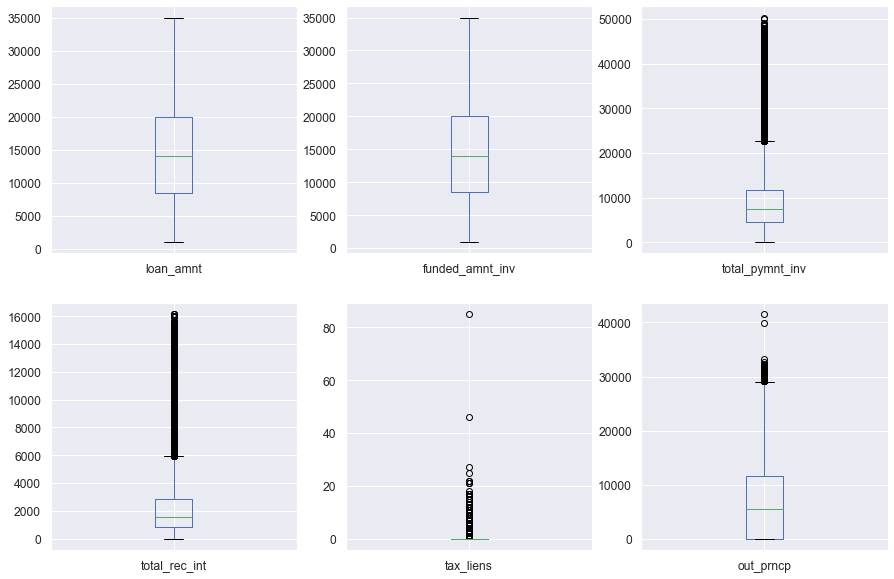

In [50]:
plt.figure(figsize=(15,10))
for i, col in enumerate(["loan_amnt","funded_amnt_inv", "total_pymnt_inv",
                         "total_rec_int", "tax_liens", "out_prncp"], start=1):
    plt.subplot(2, 3, i)
    y2015.boxplot(col)

In [51]:
from scipy.stats.mstats import winsorize
winsorize_loan_amnt = winsorize(y2015["loan_amnt"],(0, 0.10))
winsorize_funded_amnt_inv = winsorize(y2015["funded_amnt_inv"],(0, 0.10))
winsorize_total_pymnt_inv = winsorize(y2015["total_pymnt_inv"],(0, 0.10))
winsorize_total_rec_int = winsorize(y2015["total_rec_int"],(0, 0.10))
winsorize_tax_liens = winsorize(y2015["tax_liens"],(0, 0.10))
winsorize_out_prncp = winsorize(y2015["out_prncp"],(0, 0.10))


winsorize_loan_amnt, winsorize_funded_amnt_inv, winsorize_total_pymnt_inv, winsorize_total_rec_int,winsorize_tax_liens, winsorize_out_prncp

(masked_array(data=[16000.,  9600., 25000., ..., 13000., 12000., 20000.],
              mask=False,
        fill_value=1e+20),
 masked_array(data=[16000.,  9600., 25000., ..., 13000., 12000., 20000.],
              mask=False,
        fill_value=1e+20),
 masked_array(data=[ 4519.68,  3572.97, 17949.53, ...,  5034.02,  5366.99,
                    15966.05],
              mask=False,
        fill_value=1e+20),
 masked_array(data=[2188.56,  608.66, 1224.23, ..., 2506.32, 2234.98,
                    3441.72],
              mask=False,
        fill_value=1e+20),
 masked_array(data=[0., 0., 0., ..., 0., 0., 0.],
              mask=False,
        fill_value=1e+20),
 masked_array(data=[13668.88,  6635.69,     0.  , ...,     0.  ,     0.  ,
                     7475.67],
              mask=False,
        fill_value=1e+20))

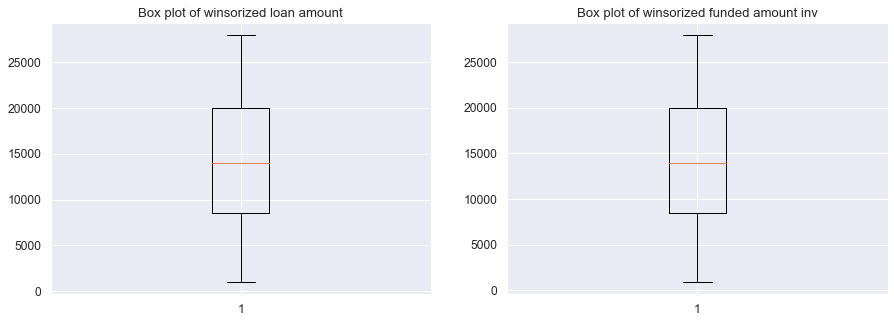

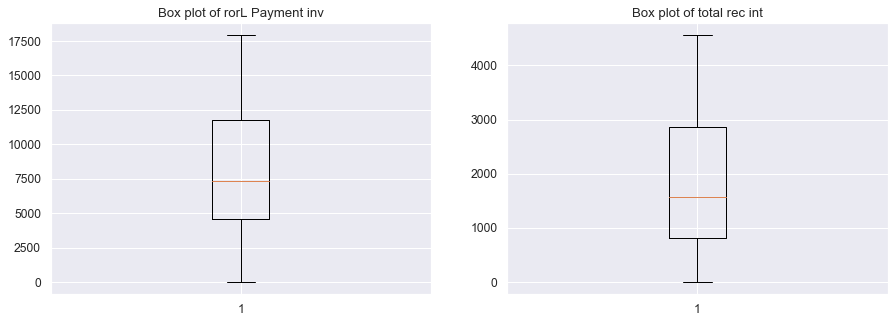

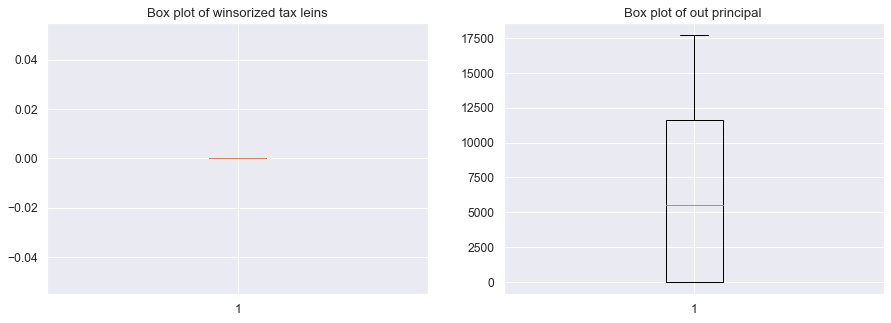

In [52]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(winsorize_loan_amnt, whis = 5)
plt.title("Box plot of winsorized loan amount")

plt.subplot(1,2,2)
plt.boxplot(winsorize_funded_amnt_inv, whis = 5)
plt.title("Box plot of winsorized funded amount inv")
plt.show()


plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(winsorize_total_pymnt_inv, whis = 5)
plt.title("Box plot of rorL Payment inv")

plt.subplot(1,2,2)
plt.boxplot(winsorize_total_rec_int, whis = 5)
plt.title("Box plot of total rec int")
plt.show()


plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(winsorize_tax_liens, whis = 5)
plt.title("Box plot of winsorized tax leins")

plt.subplot(1,2,2)
plt.boxplot(winsorize_out_prncp, whis = 5)
plt.title("Box plot of out principal ")
plt.show()

In [53]:
y2015[["loan_amnt","funded_amnt_inv", "total_pymnt_inv",
                         "total_rec_int", "tax_liens", "out_prncp"]].corr()

,loan_amnt,funded_amnt_inv,total_pymnt_inv,total_rec_int,tax_liens,out_prncp
loan_amnt,1.000000,0.999994,0.706157,0.736585,0.002087,0.623926
funded_amnt_inv,0.999994,1.000000,0.706239,0.736483,0.002070,0.623858
total_pymnt_inv,0.706157,0.706239,1.000000,0.460399,-0.003961,0.048012
total_rec_int,0.736585,0.736483,0.460399,1.000000,0.011341,0.684606
tax_liens,0.002087,0.002070,-0.003961,0.011341,1.000000,0.008380
out_prncp,0.623926,0.623858,0.048012,0.684606,0.008380,1.000000


In [54]:
X = y2015.drop(['loan_amnt'], axis=1)

y = y2015['loan_amnt']

In [55]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [56]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((336876, 50), (84219, 50))

In [57]:

y2015.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
emp_length                     23817
home_ownership                     0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
purpose                            0
title                            132
delinq_2yrs                        0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
revol_bal                          0
initial_list_status                0
out_prncp                          0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_int                      0
l

In [58]:
y2015.drop(['emp_length','next_pymnt_d','verification_status_joint','open_acc_6m','open_il_12m','open_il_24m',
            'open_rv_12m','open_rv_24m','inq_fi','inq_last_12m','mths_since_recent_inq',
            'num_tl_120dpd_2m','last_pymnt_d','title'],1, inplace=True)

In [59]:
y2015_updated = pd.get_dummies(y2015)

In [60]:
y2015_updated.shape

(421095, 106)

In [62]:
y2015_updated

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,delinq_2yrs,inq_last_6mths,open_acc,...,last_credit_pull_d_May-2015,last_credit_pull_d_May-2016,last_credit_pull_d_Nov-2015,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,14.85,379.39,0.0,0.0,11.0,...,0,0,0,0,0,0,0,0,1,0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,7.49,298.58,0.0,0.0,7.0,...,0,0,0,0,0,0,0,0,1,0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,7.49,777.55,0.0,1.0,9.0,...,0,0,0,0,0,0,0,0,1,0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,6.49,858.05,0.0,0.0,16.0,...,0,0,0,0,0,0,0,0,1,0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,19.89,320.99,0.0,4.0,18.0,...,0,0,0,0,0,0,0,0,1,0
5,68506798.0,73396623.0,23000.0,23000.0,23000.0,8.49,471.77,0.0,0.0,21.0,...,0,0,0,0,0,0,0,0,1,0
6,68566886.0,73456723.0,29900.0,29900.0,29900.0,12.88,678.49,0.0,0.0,15.0,...,0,0,0,0,0,0,0,0,1,0
7,68577849.0,73467703.0,18000.0,18000.0,18000.0,11.99,400.31,0.0,0.0,17.0,...,0,0,0,0,0,0,0,0,1,0
8,66310712.0,71035433.0,35000.0,35000.0,35000.0,14.85,829.90,0.0,0.0,13.0,...,0,0,0,0,0,0,0,0,1,0
9,68476807.0,73366655.0,10400.0,10400.0,10400.0,22.45,289.91,1.0,3.0,12.0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015_updated.drop('loan_amnt', 1) # predicting loan_amount so we drop it from 'X' and 1 indicate x axes
Y = y2015_updated['loan_amnt']
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

/Users/kingcheneyon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/kingcheneyon/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kingcheneyon/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kingcheneyon/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

array([0.72893061, 0.76089509, 0.76385554, 0.77149877, 0.77767764,
       0.78451291, 0.77988067, 0.76476364, 0.76281528, 0.73324177])

The folds are more constant after running the 10 folds.